Veamos un ejemplo que Gerón muestra en su libro. Supongamos que queremos saber si el dinero hace felices a las personas.

Para esto, vamos a descargar los datos del "Índice para una Vida Mejor" del sitio web de la OCDE y las estadísticas del Banco Mundial sobre el producto interior bruto (PIB) per cápita. Luego unimos las tablas y las ordenamos por PIB per cápita.

*   **OCDE**: Organización internacional que reúne países para mejorar sus políticas económicas y sociales.
Banco Mundial: Institución que financia proyectos y apoya el desarrollo
*   **Banco Mundial**: Institución que financia proyectos y apoya el desarrollo económico de países.
*   **PIB / PIB per cápita**: El PIB mide todo lo que produce un país; el PIB per cápita muestra cuánto produce o gana, en promedio, cada persona.

In [2]:
import urllib.request # urllib es un paquete de python que sirve para "consultar en la web", y request es un módulo específico dentro de esta librería
from pathlib import Path # pathlib es un módulo estándar de Python que sirve para trabajar con rutas de archivos y directorios de forma más intuitiva que con cadenas de texto

# Crea un objeto Path que representa la ruta ./datasets/lifesat.
datapath = Path() / "datasets" / "lifesat"

# Crea la carpeta datasets/lifesat.
# parents=True → crea todas las carpetas intermedias si no existen.
# exist_ok=True → no da error si la carpeta ya existe.
datapath.mkdir(parents=True, exist_ok=True)

# Define la URL base donde están los archivos que queremos descargar.
# En este caso, el fichero está en el repositorio de Gerón
data_root = "https://github.com/ageron/data/raw/main/"

# Itera sobre los nombres de los archivos que queremos descargar.
# Vamos a descargar los dos archivos explicados antes
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):

    # Comprueba si el archivo ya existe en nuestra carpeta local. Si existe, no lo descarga otra vez.
    if not (datapath / filename).is_file():

        # Muestra un mensaje indicando qué archivo se está descargando.
        print("Downloading", filename)

        # Construye la URL completa del archivo a descargar.
        url = data_root + "lifesat/" + filename

        # Descarga el archivo desde la URL y lo guarda en la ruta local especificada.
        urllib.request.urlretrieve(url, datapath / filename)

# Para que este código funcione en Google Colab:
# Las rutas de archivos no se crean automáticamente, pero Path funciona igual.
# Los archivos se guardan en la carpeta temporal de Colab (/content/ por defecto).
# No necesitas instalar urllib ni pathlib, son parte de Python estándar.

Ya tenemos los ficheros descargados, ahora podemos leerlos:

In [3]:
# Importamos la librería pandas, que sirve para trabajar con datos en forma de tablas
import pandas as pd

# Leemos los archivos CSV que descargamos antes (están en la carpeta 'datasets/lifesat')
# Cada archivo se convierte en una "tabla" (DataFrame) dentro de Python
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

# Elegimos el año con el que queremos trabajar
gdp_year = 2020

# Guardamos los nombres de las columnas que queremos usar más adelante
gdppc_col = "GDP per capita (USD)"   # Producto Interno Bruto por persona (en dólares)
lifesat_col = "Life satisfaction"    # Nivel de satisfacción con la vida

# Filtramos la tabla para quedarnos solo con los datos del año 2020
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]

# Eliminamos las columnas que no nos interesan ("code" y "year")
# axis=1 indica que estamos borrando columnas (no filas)
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)

# Cambiamos los nombres de las columnas para que sean más claros
gdp_per_capita.columns = ["Country", gdppc_col]

# Hacemos que la columna "Country" (país) sea el índice de la tabla
# Así cada fila estará identificada por el nombre del país
gdp_per_capita.set_index("Country", inplace=True)

# Mostramos las primeras filas de la tabla para ver cómo quedó
gdp_per_capita.head()



,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


Ahora vamos a preprocesar los datos del Índice para una Vida Mejor (OECD BLI) para quedarnos solo con la columna “Satisfacción con la vida”.

In [4]:
# Filtramos las filas del DataFrame para quedarnos solo con los datos
# donde la columna "INEQUALITY" tiene el valor "TOT"
# ("TOT" significa "Total", es decir, sin distinguir por género, edad u otros factores)
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

# Reorganizamos la tabla con pivot() para que:
# - Cada país quede en una fila (index="Country")
# - Cada tipo de indicador (por ejemplo, "Life satisfaction", "Income", etc.) sea una columna
# - Los valores numéricos de esos indicadores estén en las celdas (values="Value")
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

# Mostramos las primeras filas del nuevo DataFrame para comprobar el resultado
oecd_bli.head()


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Ahora combinemos los datos de satisfacción con la vida y de PIB per cápita, quedándonos solo con las columnas PIB per cápita y Satisfacción con la vida.

In [5]:
# Unimos (fusionamos) las dos tablas: oecd_bli y gdp_per_capita
# La unión se hace usando los índices (en este caso, el nombre del país)
# Esto crea una nueva tabla con las columnas de ambas fuentes de datos
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)

# Ordenamos las filas del DataFrame según la columna del PIB per cápita
# Esto facilita analizar la relación entre el PIB y la satisfacción con la vida
full_country_stats.sort_values(by=gdppc_col, inplace=True)

# Nos quedamos únicamente con las columnas de interés:
# "PIB per cápita" y "Satisfacción con la vida"
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

# Mostramos las primeras filas del DataFrame resultante
full_country_stats.head()


,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


Para ilustrar el riesgo de sobreajuste (overfitting), Gerón utiliza solo una parte de los datos (todos los países con un PIB per cápita entre min_gdp y max_gdp). Más adelante, muestra los países que se habían omitido y demuestra que no siguen en absoluto la misma tendencia lineal.

Gerón emplea este ejemplo para mostrar cómo un modelo puede parecer muy preciso si se analiza solo con una parte limitada de los datos (por ejemplo, países con PIB medio). Sin embargo, cuando se incorporan los países que quedaron fuera (con PIB muy alto o muy bajo), la relación deja de ser lineal, evidenciando el problema del sobreajuste, que ocurre cuando un modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos casos.

In [6]:
# Definimos los límites inferior y superior del PIB per cápita
# Solo queremos analizar los países cuyo PIB per cápita esté dentro de este rango
min_gdp = 23_500
max_gdp = 62_500

# Filtramos la tabla para quedarnos únicamente con los países
# que tienen un PIB per cápita entre min_gdp y max_gdp (inclusive)
# La condición usa el operador "&" (AND) para combinar ambos filtros
country_stats = full_country_stats[
    (full_country_stats[gdppc_col] >= min_gdp) &
    (full_country_stats[gdppc_col] <= max_gdp)
]

# Mostramos las primeras filas del nuevo DataFrame con los países seleccionados
country_stats.head()


,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


En este punto sería recomendable guardar los resultados ya que nos ha costado algo de trabajo llegar a esta tabla.

In [7]:
# Guardamos el DataFrame 'country_stats' en un archivo CSV llamado 'lifesat.csv'
# Este archivo contiene solo los países dentro del rango de PIB per cápita definido (min_gdp a max_gdp)
country_stats.to_csv(datapath / "lifesat.csv")

# Guardamos el DataFrame completo 'full_country_stats' en otro archivo CSV llamado 'lifesat_full.csv'
# Este archivo incluye todos los países, sin aplicar ningún filtro
full_country_stats.to_csv(datapath / "lifesat_full.csv")


Antes de continuar, vamos a crear una pequeña función axiliar. El propósito de esta función auxiliar es facilitar la organización y el guardado de figuras generadas con matplotlib.

In [8]:
# Importamos la clase Path del módulo pathlib para trabajar con rutas de archivos de forma segura
from pathlib import Path

# Definimos la carpeta donde se guardarán las figuras generadas
# Se crea la ruta "./images/fundamentals"
IMAGES_PATH = Path() / "images" / "fundamentals"

# Creamos la carpeta (y todas las carpetas intermedias si no existen)
# parents=True permite crear carpetas intermedias
# exist_ok=True evita errores si la carpeta ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Definimos una función para guardar figuras de matplotlib de forma consistente
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Construimos la ruta completa del archivo donde se guardará la figura
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    # Ajustamos automáticamente los márgenes de la figura si tight_layout=True
    if tight_layout:
        plt.tight_layout()

    # Guardamos la figura en el archivo especificado
    # fig_extension define el formato (png, pdf, etc.)
    # resolution define los puntos por pulgada (dpi) de la imagen
    plt.savefig(path, format=fig_extension, dpi=resolution)


El siguiente código lo utiliza Gerón para visualizar la relación entre el PIB per cápita y la satisfacción con la vida en diferentes países.
Su objetivo es:

1.   Explorar visualmente los datos y comprobar si existe una tendencia (por
ejemplo, que los países más ricos tienden a tener mayor satisfacción).
2.   Destacar algunos casos concretos (como Turquía, Dinamarca o EE. UU.) para mostrar que, aunque hay una tendencia general, no todos los países siguen exactamente la misma relación lineal.
3. Preparar el terreno para introducir el concepto de modelos predictivos y sobreajuste: cómo los modelos pueden captar una tendencia aparente en una parte de los datos, pero fallar cuando se observan todos los casos.

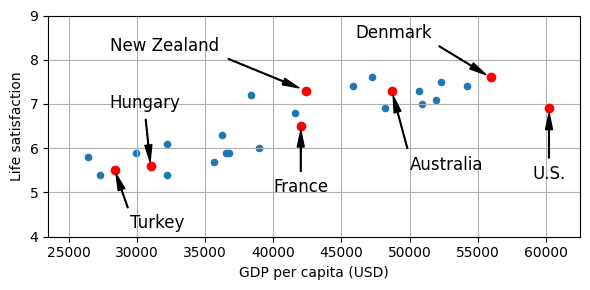

In [9]:
import matplotlib.pyplot as plt

# Creamos un gráfico de dispersión (scatter plot) para visualizar los datos
# En el eje X se representa el PIB per cápita (gdppc_col)
# En el eje Y se representa la satisfacción con la vida (lifesat_col)
# figsize define el tamaño del gráfico, y grid=True activa la cuadrícula.
# Puedes jugar con estos valores para ver cómo afectan a la presentación del gráfico
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Definimos los valores mínimo y máximo de satisfacción con la vida
# para ajustar los límites del eje Y en el gráfico.
# Puedes probar también a cambiarlos para jugar con Matplotlib
min_life_sat = 4
max_life_sat = 9

# Creamos un diccionario con algunos países seleccionados y las coordenadas
# donde se colocará la etiqueta (texto) de cada uno dentro del gráfico
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

# Recorremos cada país del diccionario para añadir su nombre al gráfico
for country, pos_text in position_text.items():
    # Obtenemos las coordenadas reales del país (sus valores en los datos)
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]

    # Ajuste estético: cambiamos el nombre "United States" por "U.S." en la etiqueta
    # Gerón dejó aquí esta línea, pero no es muy eficiente. Te reto a que
    # me digas por qué.
    country = "U.S." if country == "United States" else country

    # Añadimos una etiqueta con el nombre del país y una flecha que apunta al punto correspondiente
    plt.annotate(
        country,                      # El texto que queremos mostrar (nombre del país)
        xy=(pos_data_x, pos_data_y),  # Coordenadas del punto real en el gráfico (donde se encuentra el país)
        xytext=pos_text,              # Coordenadas donde se colocará la etiqueta (para no tapar el punto)
        fontsize=12,                  # Tamaño del texto de la etiqueta
        arrowprops=dict(               # Propiedades de la flecha que conecta la etiqueta con el punto
            facecolor='black',        # Color de la flecha
            width=0.5,                # Grosor de la línea de la flecha
            shrink=0.08,              # Acorta la flecha para que no toque directamente el marcador
            headwidth=5               # Ancho de la cabeza de la flecha
        )
    )


    # Marcamos el punto del país con un pequeño círculo rojo
    plt.plot(pos_data_x, pos_data_y, "ro")

# Ajustamos los límites de los ejes X e Y para encuadrar bien el gráfico
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con un nombre de archivo
save_fig('money_happy_scatterplot')

# Mostramos el gráfico final en pantalla
plt.show()


En su libro, Gerón indica que parece que hay una tendencia aquí. Aunque los datos son ruidosos (es decir, parcialmente aleatorios), parece que la satisfacción con la vida aumenta más o menos de manera lineal a medida que crece el PIB per cápita de un país. Por lo tanto, se imagina que querriamos modelar la satisfacción con la vida como una función lineal del PIB per cápita. Este paso se llama, comenta en su libro, selección de modelo: hemos seleccionado un modelo lineal de satisfacción con la vida con un solo atributo, el PIB per cápita.

El siguiente código selecciona un subconjunto de países específicos (los que se habían destacado con etiquetas en el gráfico) y muestra sus valores de PIB per cápita y satisfacción con la vida, ordenados por PIB.
Es útil para ver de manera clara los datos de los países destacados y compararlos entre sí.

In [10]:
# Seleccionamos únicamente los países que queremos resaltar en el gráfico
# `position_text.keys()` contiene los nombres de los países que hemos etiquetado
# `loc` permite acceder a las filas de un DataFrame usando los nombres del índice (países)
highlighted_countries = country_stats.loc[list(position_text.keys())]

# Mostramos solo las columnas de interés: PIB per cápita y Satisfacción con la vida
# Además, ordenamos los países por el PIB per cápita para comparar más fácilmente
# Si en sort_values() no indicamos nada más, , ascending=True por defecto, es decir,
# La columna por la que se ordena lo hará de menor a mayor.
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)


,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


El siguiente código crea un gráfico que muestra cómo se relacionan dos variables:

1.   El PIB per cápita de un país (es decir, cuánto dinero produce por persona)
2.   Su nivel de satisfacción con la vida.

Primero, Gerón dibuja los puntos correspondientes a cada país.
Luego, añade tres líneas rectas que representan tres modelos diferentes.
Cada una tiene valores distintos del término independiente (w1) y pendiente (w2), que determinan dónde empieza la línea y cuánto se inclina.

Al mostrar las tres líneas a la vez, el código permite comparar cómo cambia la predicción cuando modificamos estos parámetros. Así podemos ver qué combinaciones se acercan mejor a los datos reales.

Finalmente, guarda el gráfico como imagen y lo muestra en pantalla.

Con este ejemplo, Gerón quiere mostrar de forma visual e intuitiva cómo funcionan los parámetros de un modelo lineal.



*   El parámetro θ₀ (término independiente) mueve la línea hacia arriba o hacia abajo.
*   El parámetro θ₁ (pendiente) controla la inclinación: si la línea sube o baja con el PIB.

Al variar estos valores, podemos ver cómo la línea se ajusta mejor o peor a los puntos de los países.

Este ejercicio sirve como introducción a la regresión lineal, una técnica que busca la mejor línea posible para representar la relación entre dos variables.

En resumen, Gerón utiliza este gráfico para que entendamos cómo los parámetros dan forma al modelo y por qué elegir los valores adecuados es clave para hacer buenas predicciones.

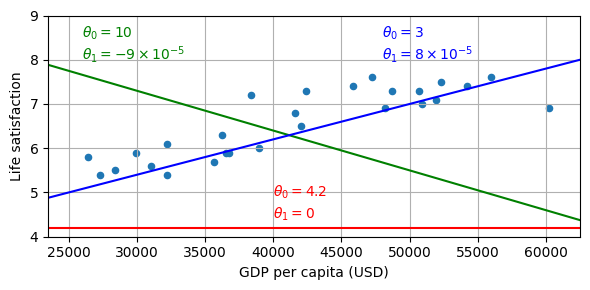

In [11]:
import numpy as np

# Creamos un gráfico de dispersión (scatter plot) con los datos de los países
# Eje X: PIB per cápita, Eje Y: Satisfacción con la vida
# figsize define el tamaño del gráfico y grid=True añade la cuadrícula
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Creamos un array de valores de PIB per cápita uniformemente distribuidos
# Esto se usará para dibujar las líneas de los modelos lineales
X = np.linspace(min_gdp, max_gdp, 1000)

# -------- Primer modelo --------
w1, w2 = 4.2, 0  # Definimos los parámetros del modelo lineal (término independiente y pendiente)
plt.plot(X, w1 + w2 * 1e-5 * X, "r")  # Dibujamos la línea roja correspondiente al modelo
# Añadimos etiquetas de los parámetros del modelo en el gráfico
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")  # Término independiente
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")   # Pendiente

# -------- Segundo modelo --------
w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")  # Línea verde
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

# -------- Tercer modelo --------
w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")  # Línea azul
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

# Ajustamos los límites de los ejes para que se vea todo el rango de datos
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con el nombre 'tweaking_model_params_plot'
save_fig('tweaking_model_params_plot')

# Mostramos el gráfico final en pantalla
plt.show()


Aquí es donde entra en juego el **algoritmo de regresión lineal**: se le proporcionan los ejemplos de entrenamiento (en este caso, los datos de los países con su PIB per cápita y su nivel de satisfacción con la vida), y el algoritmo **encuentra los parámetros** que hacen que el modelo lineal se ajuste **lo mejor posible a los datos**.


In [12]:
# Importamos el módulo de regresión lineal de scikit-learn
# Este módulo nos permite crear modelos de regresión lineal fácilmente
from sklearn import linear_model

# Creamos las variables de entrada (X) y salida (y) para el modelo
# X_sample: matriz con los valores de PIB per cápita de los países
# y_sample: matriz con los valores de satisfacción con la vida de los países
# [[ ]] se usa para asegurarnos de que sean matrices 2D, como requiere sklearn
X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

# Creamos un objeto de regresión lineal
# Este objeto representa un modelo lineal que aprenderá la relación entre X e y
lin1 = linear_model.LinearRegression()

# Entrenamos (ajustamos) el modelo usando los datos de entrada y salida
# El método fit encuentra los parámetros óptimos θ0 (intercepto) y θ1 (pendiente)
lin1.fit(X_sample, y_sample)

# Extraemos los parámetros aprendidos por el modelo
# lin1.intercept_ → el intercepto θ0
# lin1.coef_ → la pendiente θ1 (coef_ es un array, usamos ravel() para convertirlo a 1D)
t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]

# Mostramos los valores aprendidos de los parámetros en la consola
# {:.2f} → formato con 2 decimales para el intercepto
# {:.2e} → formato en notación científica para la pendiente
print(f"θ0={t0:.2f}, θ1={t1:.2e}")


θ0=3.75, θ1=6.78e-05



A este proceso se le llama **entrenar el modelo**.
En este ejemplo, el algoritmo determina que los valores óptimos de los parámetros son:

[θ0=3.75, θ1=6.78e-05]


⚠️ **Advertencia sobre el término “modelo”**
El término *modelo* puede referirse a distintas cosas:

* A un **tipo de modelo**, como la regresión lineal.
* A una **arquitectura específica**, por ejemplo, una regresión lineal con una variable de entrada (PIB per cápita) y una de salida (satisfacción con la vida).
* O al **modelo ya entrenado**, listo para hacer predicciones, que en este caso sería una regresión lineal con los parámetros aprendidos:
  [θ0=3.75, θ1=6.78e-05]

La **selección del modelo** consiste en escoger qué tipo de modelo se va a usar y definir su estructura.
El **entrenamiento del modelo** consiste en ejecutar un algoritmo que encuentre los valores de los parámetros que mejor se ajusten a los datos de entrenamiento, de forma que el modelo pueda luego hacer **buenas predicciones con nuevos datos**.

Una vez entrenado, el modelo se ajusta a los datos de entrenamiento **todo lo posible** (para un modelo lineal).

Ahora el modelo está listo para hacer **predicciones**.


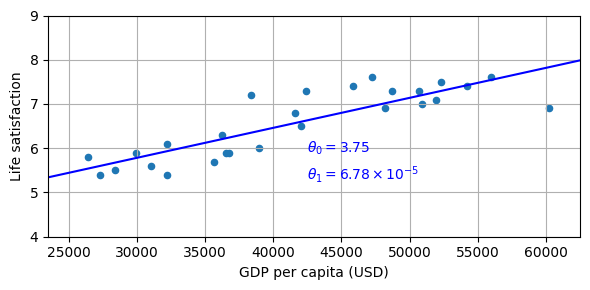

In [13]:
# Creamos un gráfico de dispersión de los países
# kind='scatter' → gráfico de puntos
# figsize=(5,3) → tamaño del gráfico
# grid=True → añade cuadrícula
# x=gdppc_col → eje X: PIB per cápita
# y=lifesat_col → eje Y: Satisfacción con la vida
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Generamos un array de 1000 puntos uniformemente distribuidos entre min_gdp y max_gdp
# Esto servirá para dibujar la línea de regresión
X = np.linspace(min_gdp, max_gdp, 1000)

# Dibujamos la línea de regresión lineal ajustada con los parámetros aprendidos t0 y t1
# "b" → color azul
plt.plot(X, t0 + t1 * X, "b")

# Añadimos el texto del intercepto θ0 en el gráfico
# Se coloca cerca del borde inferior derecho para no tapar los puntos
plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")

# Añadimos el texto de la pendiente θ1 en el gráfico
# Multiplicamos t1 por 1e5 para mostrarlo de manera más legible en notación científica
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

# Ajustamos los límites de los ejes X y Y para que se vea todo el rango de datos y la línea
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Guardamos la figura con el nombre 'best_fit_model_plot'
save_fig('best_fit_model_plot')

# Mostramos el gráfico final en pantalla
plt.show()


Ya estamos listo para usar el modelo para hacer predicciones. Por ejemplo, supongamos que queremos saber cuál es el nivel de felicidad de los chipriotas (Gerón usa este ejemplo en su libro), pero los datos de la OCDE no incluyen esa información. Por suerte, podemos utilizar el modelo para hacer una buena estimación: buscamos el PIB per cápita de Chipre, que es de 37.655 dólares, y luego aplicamos el modelo para predecir el nivel de satisfacción con la vida.

In [14]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

In [15]:
# Usamos el modelo entrenado (lin1) para hacer una predicción
# lin1.predict() espera una matriz (2D), por eso se ponen los dobles corchetes [[...]]
# En este caso, le damos el PIB per cápita de Chipre como entrada
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]

# Mostramos en pantalla el valor predicho de satisfacción con la vida para Chipre
cyprus_predicted_life_satisfaction


np.float64(6.301656332738056)

Aquí hemos usado el modelo de regresión lineal entrenado (lin1) para hacer una predicción.

Le pasamos como entrada al modelo el PIB per cápita de Chipre (cyprus_gdp_per_capita).

El método .predict() devuelve una matriz 2D con el resultado (porque así trabaja scikit-learn). Por eso se accede al primer elemento con [0, 0] para obtener solo el número.

Si estás interesado en más información sobre el modelo de regresión lineal de scikit-learn, aquí te dejo el enlace a la documentación oficial: https://scikit-learn.org/stable/modules/linear_model.html

Vamos a mostrar visualmente la predicción del modelo lineal para Chipre dentro del contexto de todos los países. Para esto, Gerón dibuja los datos reales (puntos de países) en un gráfico de dispersión y traza la línea azul del modelo lineal ajustado (la relación aprendida entre PIB per cápita y satisfacción).

Para remarcar la predicción hecha para Chipre, marca su posición, y dibuja una línea roja discontinua que sube desde su PIB hasta la predicción del modelo.

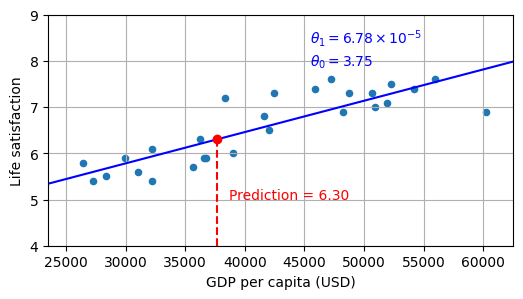

In [16]:
# Creamos un gráfico de dispersión con los datos reales
# Cada punto representa un país, mostrando la relación entre
# PIB per cápita (eje X) y satisfacción con la vida (eje Y)
country_stats.plot(kind='scatter', figsize=(6, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# Generamos un rango de valores de PIB entre el mínimo y el máximo
# Esto servirá para dibujar la línea de regresión
X = np.linspace(min_gdp, max_gdp, 1000)

# Dibujamos la línea azul del modelo lineal entrenado (la "mejor línea de ajuste")
# t0 = intercepto, t1 = pendiente
# Estos valores ya se calcularon cuando se entrenó el modelo
plt.plot(X, t0 + t1 * X, "b")

# Mostramos en el gráfico los valores de los parámetros del modelo (θ0 y θ1)
# Se colocan cerca de la parte superior derecha para que sean visibles
plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

# Dibujamos una línea discontinua roja (r--) que marca visualmente la predicción de Chipre
# Va desde el eje X (PIB de Chipre) hasta la predicción en el eje Y
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")

# Añadimos una etiqueta de texto junto a la línea roja
# Muestra el valor predicho de satisfacción con la vida para Chipre
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")

# Dibujamos un punto rojo en la posición exacta de la predicción
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

# Ajustamos los límites de los ejes X e Y
# Esto asegura que se vea todo el rango de datos, la línea de regresión y la predicción
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Mostramos el gráfico completo en pantalla
plt.show()


Para poder generalizar bien, es fundamental que los datos de entrenamiento sean representativos de los nuevos casos sobre los que queremos generalizar. Esto es cierto tanto si usamos aprendizaje basado en instancias como si usamos aprendizaje basado en modelos.

Por ejemplo, el conjunto de países que se utilizamos antes para entrenar el modelo lineal no era perfectamente representativo: no incluía ningún país con un PIB per cápita inferior a 23.500$ ni superior a 62.500$.

Vamos a generar ahora una figura, como hace Gerón en su libro, que muestra cómo se ven los datos cuando se añaden países en esos rangos.

In [17]:
# Filtramos los países que están fuera del rango de PIB per cápita usado antes (min_gdp y max_gdp)
# Es decir, seleccionamos los países "faltantes" (muy pobres o muy ricos)
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data  # Mostramos los datos de estos países faltantes


,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


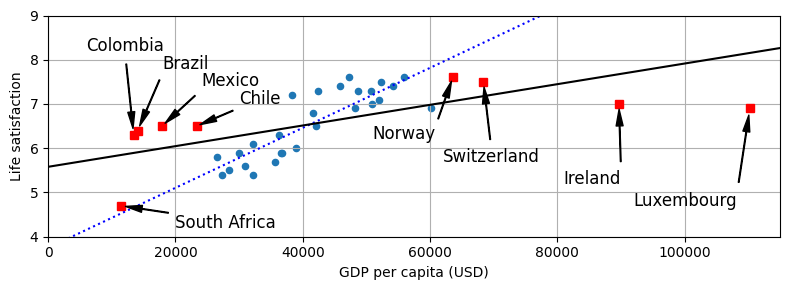

In [18]:
# Diccionario con los países faltantes y las coordenadas donde se colocarán sus etiquetas en el gráfico
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}


# Dibujamos un gráfico de dispersión (PIB per cápita vs. satisfacción con la vida)
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)


# Recorremos los países faltantes y los añadimos al gráfico con una etiqueta y una flecha
for country, pos_text in position_text_missing_countries.items():
    # Obtenemos los valores reales de PIB y satisfacción para ese país
    pos_data_x, pos_data_y = missing_data.loc[country]

    # Dibujamos el nombre del país con una flecha que apunta a su punto
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    # Marcamos el punto del país en rojo (símbolo 'rs' = red square)
    plt.plot(pos_data_x, pos_data_y, "rs")


# Creamos un rango de valores de PIB para dibujar las líneas del modelo
X = np.linspace(0, 115_000, 1000)

# Dibujamos la línea discontinua azul: es el modelo lineal original (entrenado con menos datos)
plt.plot(X, t0 + t1 * X, "b:")


# Entrenamos un nuevo modelo lineal pero ahora con *todos* los países (más representativo)
lin_reg_full = linear_model.LinearRegression()

# Preparamos los datos completos (todas las filas y columnas necesarias)
Xfull = np.c_[full_country_stats[gdppc_col]]      # PIB per cápita
yfull = np.c_[full_country_stats[lifesat_col]]    # Satisfacción con la vida

# Ajustamos el modelo a todos los datos
lin_reg_full.fit(Xfull, yfull)

# Obtenemos los nuevos parámetros del modelo (intercepto y pendiente)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]

# Dibujamos la nueva línea de regresión (en negro)
plt.plot(X, t0full + t1full * X, "k")


# Ajustamos los límites del gráfico
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guardamos la figura y la mostramos
save_fig('representative_training_data_scatterplot')
plt.show()

Si entrenamos un modelo lineal con este nuevo conjunto de datos, obtenemos la línea continua, mientras que el modelo anterior se representa con la línea discontinua.

Como puede verse, añadir solo unos pocos países faltantes altera significativamente el modelo y deja claro que un modelo lineal tan simple probablemente no funcionará bien. Parece que los países muy ricos no son más felices que los moderadamente ricos (de hecho, parecen un poco menos felices), y, por el contrario, algunos países pobres parecen más felices que muchos ricos.

Al usar un conjunto de entrenamiento no representativo, se entrenó un modelo que probablemente no hará predicciones precisas, especialmente para los países muy pobres o muy ricos.

Es fundamental usar un conjunto de entrenamiento representativo de los casos que se quieren generalizar. Sin embargo, esto suele ser más difícil de lo que parece: si la muestra es demasiado pequeña, aparecerá ruido de muestreo (es decir, datos no representativos por azar), pero incluso muestras muy grandes pueden ser no representativas si el método de muestreo es incorrecto.
A esto se le llama sesgo de muestreo (sampling bias).

También puede ocurrir lo contrario: cuando un modelo se ajusta demasiado a los datos de entrenamiento, pero no funciona bien con nuevos datos, decimos que hay sobreajuste (overfitting).

Gerón explica que un modelo muy complejo —como uno polinómico de alto grado o una red neuronal profunda— puede detectar patrones muy sutiles, incluso aquellos que son simplemente ruido o coincidencias en los datos. Por ejemplo, un modelo podría detectar que los países con una “w” en su nombre tienen una satisfacción alta, algo claramente casual.

En esos casos, el modelo parece funcionar muy bien con los datos de entrenamiento, pero falla al generalizar a nuevas situaciones.

Por resumir: el overfitting ocurre cuando un modelo aprende demasiado bien los detalles del conjunto de entrenamiento —incluyendo el ruido o coincidencias irrelevantes—, lo que hace que pierda capacidad para predecir correctamente en nuevos casos. Veamos el ejemplo que propone Gerón:

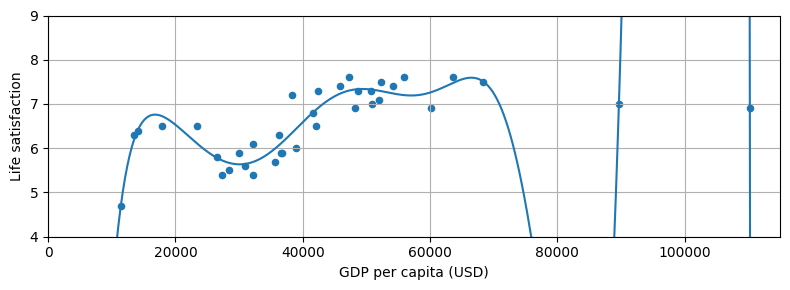

In [19]:
from sklearn import preprocessing
from sklearn import pipeline

# Dibuja los datos originales: cada punto representa un país
# Eje X: PIB per cápita (GDP per capita)
# Eje Y: Satisfacción con la vida (Life Satisfaction)
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

# Crea una transformación polinómica de grado 10.
# Esto genera nuevas características (x, x², x³, ..., x¹⁰) a partir del PIB per cápita.
# Permite que el modelo capture relaciones no lineales entre PIB y satisfacción.
poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)

# Escala los datos para que todas las características (x, x², x³...) estén en la misma escala.
# Esto mejora la estabilidad numérica y el rendimiento del modelo.
scaler = preprocessing.StandardScaler()

# Crea un modelo de regresión lineal.
# Aunque el modelo es lineal respecto a las características polinómicas, el resultado será una curva no lineal.
lin_reg2 = linear_model.LinearRegression()

# Crea una "pipeline" que encadena las tres etapas:
# 1. Generar características polinómicas.
# 2. Escalar los datos.
# 3. Ajustar la regresión lineal.
pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

# Entrena el modelo usando todos los datos disponibles.
pipeline_reg.fit(Xfull, yfull)

# Predice los valores de satisfacción para muchos valores de PIB (X).
# np.newaxis convierte X en una matriz columna (forma correcta para sklearn).
curve = pipeline_reg.predict(X[:, np.newaxis])

# Dibuja la curva ajustada por el modelo sobre el gráfico de dispersión.
plt.plot(X, curve)

# Define los límites de los ejes.
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guarda la figura con un nombre descriptivo.
save_fig('overfitting_model_plot')

# Muestra el gráfico final.
plt.show()


El código anterior crea y entrena un modelo polinómico de grado 10 para predecir la satisfacción con la vida a partir del PIB per cápita, usando una pipeline que automatiza las etapas de:

1. Generar características polinómicas.
2. Escalar los datos.
3. Ajustar una regresión lineal.

Finalmente, el código dibuja la curva resultante sobre el gráfico de dispersión de los países para mostrar cómo el modelo se ajusta (o sobreajusta) a los datos.

el modelo lineal que definimos antes tiene dos parámetros, θ₀ y θ₁. Esto da al algoritmo de aprendizaje **dos grados de libertad** para adaptarse a los datos de entrenamiento: puede ajustar tanto la **altura** (θ₀, el intercepto) como la **pendiente** (θ₁).

Si obligamos a que θ₁ = 0, el algoritmo solo podría mover la línea hacia arriba o hacia abajo, pero no cambiar su inclinación, así que la línea se ajustaría más o menos al promedio: sería un modelo muy simple.

Por otro lado, si permitimos modificar θ₁ pero le forzamos a mantenerlo **pequeño**, el algoritmo tendrá una flexibilidad intermedia: ni tan rígido como el caso anterior, ni tan libre como sin restricción.

Restringir un modelo para hacerlo más simple y reducir el riesgo de sobreajuste se llama **regularización**.

El objetivo es **encontrar el equilibrio adecuado** entre:

* Ajustar bien los datos de entrenamiento, y
* Mantener el modelo lo suficientemente simple como para generalizar bien a nuevos datos.

Piensa en la **regularización** como una forma de “ponerle límites” al modelo para que no se complique demasiado.

👉 Si un modelo tiene demasiada libertad, puede **memorizar** los datos de entrenamiento, incluso los errores o el ruido (eso es **overfitting**).

👉 Si lo restringes demasiado, no aprenderá lo suficiente (eso sería **underfitting**).

La regularización es como decirle:

> “Ajusta la línea a los datos, pero no te obsesiones con seguir cada punto al milímetro.”

Este equilibrio entre **precisión y simplicidad** es lo que permite construir modelos que realmente funcionan en el mundo real.

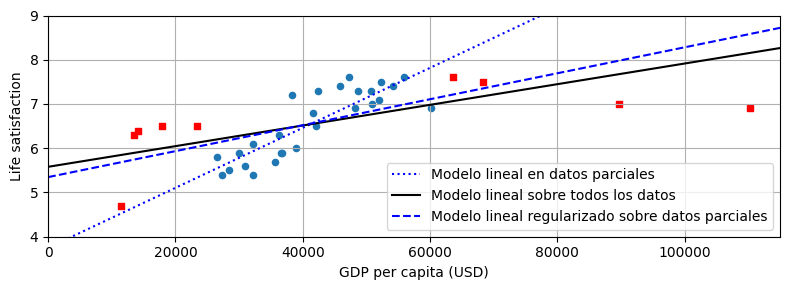

In [21]:
# Dibuja los países usados para entrenar el modelo inicial (datos parciales)
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))

# Dibuja los países "faltantes" (datos que no se usaron en el primer modelo) en rojo con forma de cuadrado
# Usa el mismo eje del gráfico anterior (ax=plt.gca()) para superponerlos
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

# Crea una secuencia de valores de PIB per cápita (de 0 a 115,000) para dibujar las líneas de regresión
X = np.linspace(0, 115_000, 1000)

# Dibuja la línea azul punteada (:) del modelo entrenado con los datos parciales
plt.plot(X, t0 + t1*X, "b:", label="Modelo lineal en datos parciales")

# Dibuja la línea negra sólida del modelo entrenado con todos los países (datos completos)
plt.plot(X, t0full + t1full * X, "k-", label="Modelo lineal sobre todos los datos")

# Crea un modelo lineal regularizado (Ridge Regression)
# alpha controla el grado de regularización (muy alto = más restricción = línea más plana)
ridge = linear_model.Ridge(alpha=10**9.5)

# Extrae las columnas de entrada (PIB) y salida (satisfacción)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]

# Entrena el modelo Ridge usando solo los datos parciales
ridge.fit(X_sample, y_sample)

# Obtiene los parámetros del modelo entrenado: intercepto (t0ridge) y pendiente (t1ridge)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]

# Dibuja la línea azul discontinua (--), correspondiente al modelo regularizado
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Modelo lineal regularizado sobre datos parciales")

# Añade una leyenda en la parte inferior derecha
plt.legend(loc="lower right")

# Define los límites de los ejes (PIB per cápita y satisfacción)
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Guarda la figura como archivo
save_fig('ridge_model_plot')

# Muestra el gráfico final
plt.show()